# Use CDF to Calculate Probabilities
---

Author: Jackson Muehlbauer

Date: 3/5/23

In [1]:
# imports
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
from sklearn.preprocessing import StandardScaler
from scipy import stats

In [2]:
# load data
path = 'Data/weight-height male-female - weight-height.csv'
df = pd.read_csv(path)
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
# slice out only female heights
females = df.loc[df['Gender'] == 'Female', 'Height'].to_numpy()
females[:5]

array([58.91073204, 65.23001251, 63.36900376, 64.47999743, 61.79309615])

In [5]:
# stats
mean = np.mean(females)
std = np.std(females)

<AxesSubplot: ylabel='Density'>

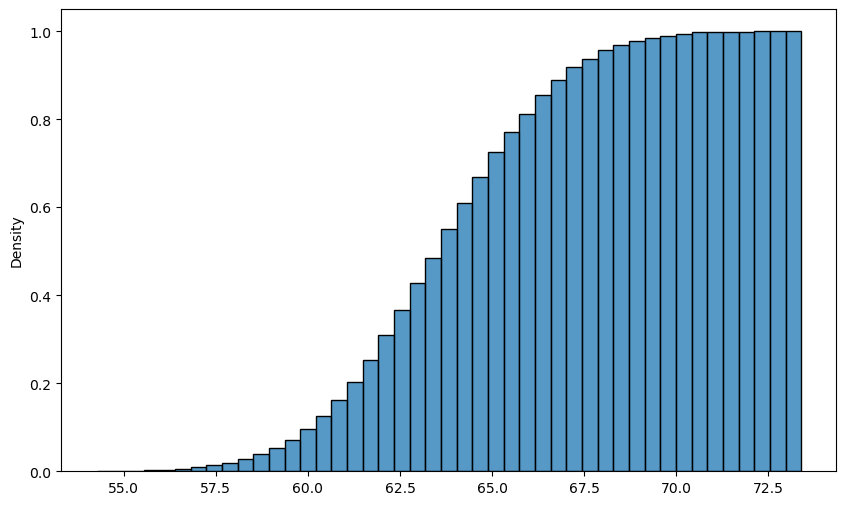

In [8]:
# For sanity checking
# plot cdf
fig, ax = plt.subplots(figsize = (10, 6))
sns.histplot(x = females, stat = 'density', cumulative = True)

In [6]:
# 1. Probability of a female's height is between 55.0 and 56.0
high_end = 56.0
low_end = 55.0

prob = stats.norm.cdf(high_end, loc = mean, scale = std) - stats.norm.cdf(low_end, loc = mean, scale = std)

print(f"Probability of a female's height is between 55.0 and 56.0: {prob}")

Probability of a female's height is between 55.0 and 56.0: 0.0015043054289559745


In [7]:
# 2. Probability of a female's height is less than 5 feet
cut_off = 60
prob = stats.norm.cdf(cut_off, loc = mean, scale = std)

print(f"Probability of a female's height is less than 5 feet: {prob}")

Probability of a female's height is less than 5 feet: 0.0844649272520746


In [9]:
# 3. Probability of a female's height is greater than the mean?
# by definition this should be 0.5
cut_off = mean
prob = 1 - stats.norm.cdf(cut_off, loc = mean, scale = std) # subtract from 1 for greater than

print(f"Probability of a female's height is greater than the mean: {prob}")

Probability of a female's height is greater than the mean: 0.5
